## Mapping

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import rtree
import pygeos
import folium
import geopandas as gpd
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
# Import the dataframe with the raw reviews
data = pd.read_csv('clean_b1_veryfinal_categories.csv')

In [3]:
# Drop the unnecessary columns
data.drop(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)



In [4]:
# Get lat per review
#data['lat'] = [d.get('lat') for d in data.location]
#data['lat']

In [5]:
# Get lon per review
#data['lon'] = [d.get('lng') for d in data.location]
#data['lon']

In [6]:
# Create an initial map of Berlin
# Berlin latitude and longitude values
latitude = 52.520008
longitude = 13.404954 
# create map of Berlin and display it
berlin_map = folium.Map(location=[latitude, longitude], zoom_start=12)
berlin_map

In [7]:
# add marker one by one on the map
#for i in range(0,len(data)):
#    folium.Marker(
#    location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
#    popup=data.iloc[i]['title'], tooltip='Click for more information').add_to(berlin_map)

In [8]:
# Add markers of all the shops in Belrin
for i in range(0,len(data)):
    folium.Marker(location=[data.loc[i]['lat'], data.loc[i]['lon']]).add_to(berlin_map)

In [9]:
"""# Add markers of all the shops in Belrin with pop-up shop name and hoover message -- DOES NOT DISPLAY 
for i in range(0,len(data)):
    folium.Marker(location=[data.loc[i]['lat'], data.loc[i]['lon']]popup=data.loc[i]['title'], tooltip='Click for more information').add_to(berlin_map)"""

"# Add markers of all the shops in Belrin with pop-up shop name and hoover message -- DOES NOT DISPLAY \nfor i in range(0,len(data)):\n    folium.Marker(location=[data.loc[i]['lat'], data.loc[i]['lon']]popup=data.loc[i]['title'], tooltip='Click for more information').add_to(berlin_map)"

In [10]:
berlin_map

In [11]:
"""# This is supposed to cluster the shops as you zoom out
marker_cluster = MarkerCluster().add_to(berlin_map)

for point in range(0, len(data)):
    folium.Marker(location=[data.iloc[i]['lat'], data.iloc[i]['lon']]).add_to(marker_cluster)
berlin_map"""

"# This is supposed to cluster the shops as you zoom out\nmarker_cluster = MarkerCluster().add_to(berlin_map)\n\nfor point in range(0, len(data)):\n    folium.Marker(location=[data.iloc[i]['lat'], data.iloc[i]['lon']]).add_to(marker_cluster)\nberlin_map"

In [12]:
# Map with pins of all shops in Berlin
berlin_map.save("berlin_map.html")

In [34]:
# Function that shows shops per neighbourhood
def display_district(data, neighbourhood_var):
    district_df = data[data.neighbourhood_group == neighbourhood_var]#.reset_index()
    # Create an initial map of Berlin
    # Berlin latitude and longitude values
    latitude = 52.520008
    longitude = 13.404954 
    # create map and display it
    berlin_map_district = folium.Map(location=[latitude, longitude], zoom_start=12)
    for i in range(0,len(district_df)):
        folium.Marker(
        location=[district_df.loc[i]['lat'], district_df.loc[i]['lon']],
        popup=district_df.iloc[i]['title'], tooltip='Click for more information').add_to(berlin_map_district)
    return berlin_map_district


In [14]:
"""# This is supposed to zoom out and cluster the places per neighbourhood
def display_district(data, neighbourhood_var):
    district_df = data[data.neighbourhood_group == neighbourhood_var].reset_index()
    # Create an initial map of Berlin
    # Berlin latitude and longitude values
    latitude = 52.520008
    longitude = 13.404954 
    # create map and display it
    berlin_map_district = folium.Map(location=[latitude, longitude], zoom_start=12)
    
    for i in range(0,len(district_df)):
        marker_cluster = MarkerCluster().add_to(berlin_map_district)
        folium.Marker(
        location=[district_df.loc[i]['lat'], district_df.loc[i]['lon']],
        popup=district_df.iloc[i]['title'], tooltip='Click for more information').add_to(berlin_map_district)
        folium.Marker(location=[data.iloc[i]['lat'], data.iloc[i]['lon']]).add_to(marker_cluster)
    return berlin_map_district"""

"# This is supposed to zoom out and cluster the places per neighbourhood\ndef display_district(data, neighbourhood_var):\n    district_df = data[data.neighbourhood_group == neighbourhood_var].reset_index()\n    # Create an initial map of Berlin\n    # Berlin latitude and longitude values\n    latitude = 52.520008\n    longitude = 13.404954 \n    # create map and display it\n    berlin_map_district = folium.Map(location=[latitude, longitude], zoom_start=12)\n    \n    for i in range(0,len(district_df)):\n        marker_cluster = MarkerCluster().add_to(berlin_map_district)\n        folium.Marker(\n        location=[district_df.loc[i]['lat'], district_df.loc[i]['lon']],\n        popup=district_df.iloc[i]['title'], tooltip='Click for more information').add_to(berlin_map_district)\n        folium.Marker(location=[data.iloc[i]['lat'], data.iloc[i]['lon']]).add_to(marker_cluster)\n    return berlin_map_district"

In [15]:
display_district(data, 'Friedrichshain-Kreuzberg')

In [16]:
districts = gpd.read_file("https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson")
districts

,gml_id,spatial_name,spatial_alias,spatial_type,geometry
0,re_bezirke.01,01,Mitte,Polygon,"POLYGON ((13.37325 52.50377, 13.37342 52.50399..."
1,re_bezirke.02,02,Friedrichshain-Kreuzberg,Polygon,"POLYGON ((13.44471 52.49422, 13.44498 52.49443..."
2,re_bezirke.03,03,Pankow,Polygon,"POLYGON ((13.44226 52.53097, 13.44561 52.52788..."
3,re_bezirke.04,04,Charlottenburg-Wilmersdorf,Polygon,"POLYGON ((13.30748 52.46788, 13.30833 52.46754..."
4,re_bezirke.05,05,Spandau,Polygon,"POLYGON ((13.21570 52.50936, 13.21570 52.50935..."
5,re_bezirke.06,06,Steglitz-Zehlendorf,Polygon,"POLYGON ((13.26906 52.40424, 13.27045 52.40416..."
6,re_bezirke.07,07,Tempelhof-Schöneberg,Polygon,"POLYGON ((13.41802 52.37623, 13.41951 52.37618..."
7,re_bezirke.08,08,Neukölln,Polygon,"POLYGON ((13.46090 52.42075, 13.46355 52.42108..."
8,re_bezirke.09,09,Treptow-Köpenick,Polygon,"POLYGON ((13.65750 52.35191, 13.65789 52.35204..."
9,re_bezirke.10,10,Marzahn-Hellersdorf,Polygon,"POLYGON ((13.58657 52.48101, 13.58878 52.48001..."


## ALL ABOVE HERE IS FOR YOU

In [17]:
districts = gpd.read_file("https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson")
districts

,gml_id,spatial_name,spatial_alias,spatial_type,geometry
0,re_bezirke.01,01,Mitte,Polygon,"POLYGON ((13.37325 52.50377, 13.37342 52.50399..."
1,re_bezirke.02,02,Friedrichshain-Kreuzberg,Polygon,"POLYGON ((13.44471 52.49422, 13.44498 52.49443..."
2,re_bezirke.03,03,Pankow,Polygon,"POLYGON ((13.44226 52.53097, 13.44561 52.52788..."
3,re_bezirke.04,04,Charlottenburg-Wilmersdorf,Polygon,"POLYGON ((13.30748 52.46788, 13.30833 52.46754..."
4,re_bezirke.05,05,Spandau,Polygon,"POLYGON ((13.21570 52.50936, 13.21570 52.50935..."
5,re_bezirke.06,06,Steglitz-Zehlendorf,Polygon,"POLYGON ((13.26906 52.40424, 13.27045 52.40416..."
6,re_bezirke.07,07,Tempelhof-Schöneberg,Polygon,"POLYGON ((13.41802 52.37623, 13.41951 52.37618..."
7,re_bezirke.08,08,Neukölln,Polygon,"POLYGON ((13.46090 52.42075, 13.46355 52.42108..."
8,re_bezirke.09,09,Treptow-Köpenick,Polygon,"POLYGON ((13.65750 52.35191, 13.65789 52.35204..."
9,re_bezirke.10,10,Marzahn-Hellersdorf,Polygon,"POLYGON ((13.58657 52.48101, 13.58878 52.48001..."


In [18]:
gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.lon, data.lat), crs="EPSG:4236")

In [19]:
gdf

,title,address,categoryName,lat,lon,totalScore,reviewsCount,price,price_cont,our_rating,star_nr,categories_tuple,geometry,index_right,neighbourhood,neighbourhood_group,final_categories
0,OVS Kids,"Oderstraße 35 a, 14513 Teltow, Germany",Children's clothing store,52.403158,13.247410,5.0,1,NaN,NaN,5.00,1,"(""Children's clothing store"", 'Childrens store')",POINT (13.24741 52.40316),56,Teltower Damm,Steglitz - Zehlendorf,"[""Children's clothing""]"
1,H&M,"Müllerstraße 36, 13353 Berlin, Germany",Clothing store,52.549197,13.354710,3.8,442,€,1.0,3.16,250,"('Clothing store', ""Children's clothing store""...",POINT (13.35471 52.54920),21,Parkviertel,Mitte,"[""Men's clothing"", ""Children's clothing"", 'Gen..."
2,KiK Kleinmachnow,"Adolf-Grimme-Ring 8, 14532 Kleinmachnow, Germany",Clothing store,52.403294,13.219587,4.2,67,NaN,NaN,4.39,28,"('Clothing store', 'Baby clothing store', ""Chi...",POINT (13.21959 52.40329),60,Zehlendorf Südwest,Steglitz - Zehlendorf,"[""Men's clothing"", ""Women's clothing"", 'Baby c..."
3,SUMO Curated Designer & Vintage Online Store,"Prinzessinnenstraße 7, 10969 Berlin, Germany",Vintage clothing store,52.502220,13.413775,5.0,1,NaN,NaN,5.00,6,"('Vintage clothing store', 'Clothing store')",POINT (13.41378 52.50222),22,Südliche Friedrichstadt,Friedrichshain-Kreuzberg,"['Vintage clothing store', 'General clothing s..."
4,Primark,"Alexanderpl. 5-7, 10178 Berlin, Germany",Clothing store,52.522590,13.413424,4.0,5492,€,1.0,3.48,414,"('Clothing store',)",POINT (13.41342 52.52259),17,Alexanderplatz,Mitte,['General clothing store']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,TALLY WEiJL,"Badstraße 4, 13357 Berlin, Germany",Clothing store,52.549744,13.387548,3.8,63,NaN,NaN,3.96,24,"('Clothing store', 'Boutique', ""Women's clothi...",POINT (13.38755 52.54974),19,Wedding Zentrum,Mitte,"[""Women's clothing"", 'Formal wear', 'General c..."
1855,CALIDA Store,"Europaplatz 1 Hauptbahnhof, 10557 Berlin, Germany",Underwear store,52.524911,13.369492,3.6,8,NaN,NaN,3.50,4,"('Underwear store', 'Lingerie store', ""Men's c...",POINT (13.36949 52.52491),20,Moabit Ost,Mitte,"[""Men's clothing"", ""Women's clothing"", 'Underw..."
1856,Denimholics,"Schwedenstraße 13, 13357 Berlin, Germany",Men's clothing store,52.555673,13.374664,4.6,29,NaN,NaN,4.57,28,"(""Men's clothing store"",)",POINT (13.37466 52.55567),110,Osloer Straße,Mitte,"[""Men's clothing""]"
1857,Calzedonia,"Wilmersdorfer Str. 46, 10627 Berlin, Germany",Clothing store,52.509249,13.304609,4.2,32,NaN,NaN,4.25,8,"('Clothing store', ""Children's clothing store""...",POINT (13.30461 52.50925),43,Schloß Charlottenburg,Charlottenburg-Wilm.,"['Swimwear', ""Children's clothing"", 'General c..."


In [20]:
geo_neighbourhoods = gpd.read_file("neighbourhoods.geojson")

In [21]:
geo_neighbourhoods['neighbourhood'].nunique()

138

In [22]:
geo_neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
gdf = gdf.to_crs(3857)
gdf

,title,address,categoryName,lat,lon,totalScore,reviewsCount,price,price_cont,our_rating,star_nr,categories_tuple,geometry,index_right,neighbourhood,neighbourhood_group,final_categories
0,OVS Kids,"Oderstraße 35 a, 14513 Teltow, Germany",Children's clothing store,52.403158,13.247410,5.0,1,NaN,NaN,5.00,1,"(""Children's clothing store"", 'Childrens store')",POINT (1474059.561 6873973.410),56,Teltower Damm,Steglitz - Zehlendorf,"[""Children's clothing""]"
1,H&M,"Müllerstraße 36, 13353 Berlin, Germany",Clothing store,52.549197,13.354710,3.8,442,€,1.0,3.16,250,"('Clothing store', ""Children's clothing store""...",POINT (1486004.306 6900669.813),21,Parkviertel,Mitte,"[""Men's clothing"", ""Children's clothing"", 'Gen..."
2,KiK Kleinmachnow,"Adolf-Grimme-Ring 8, 14532 Kleinmachnow, Germany",Clothing store,52.403294,13.219587,4.2,67,NaN,NaN,4.39,28,"('Clothing store', 'Baby clothing store', ""Chi...",POINT (1470961.747 6873998.038),60,Zehlendorf Südwest,Steglitz - Zehlendorf,"[""Men's clothing"", ""Women's clothing"", 'Baby c..."
3,SUMO Curated Designer & Vintage Online Store,"Prinzessinnenstraße 7, 10969 Berlin, Germany",Vintage clothing store,52.502220,13.413775,5.0,1,NaN,NaN,5.00,6,"('Vintage clothing store', 'Clothing store')",POINT (1492581.376 6892073.408),22,Südliche Friedrichstadt,Friedrichshain-Kreuzberg,"['Vintage clothing store', 'General clothing s..."
4,Primark,"Alexanderpl. 5-7, 10178 Berlin, Germany",Clothing store,52.522590,13.413424,4.0,5492,€,1.0,3.48,414,"('Clothing store',)",POINT (1492542.002 6895800.110),17,Alexanderplatz,Mitte,['General clothing store']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,TALLY WEiJL,"Badstraße 4, 13357 Berlin, Germany",Clothing store,52.549744,13.387548,3.8,63,NaN,NaN,3.96,24,"('Clothing store', 'Boutique', ""Women's clothi...",POINT (1489660.510 6900770.296),19,Wedding Zentrum,Mitte,"[""Women's clothing"", 'Formal wear', 'General c..."
1855,CALIDA Store,"Europaplatz 1 Hauptbahnhof, 10557 Berlin, Germany",Underwear store,52.524911,13.369492,3.6,8,NaN,NaN,3.50,4,"('Underwear store', 'Lingerie store', ""Men's c...",POINT (1487650.497 6896224.416),20,Moabit Ost,Mitte,"[""Men's clothing"", ""Women's clothing"", 'Underw..."
1856,Denimholics,"Schwedenstraße 13, 13357 Berlin, Germany",Men's clothing store,52.555673,13.374664,4.6,29,NaN,NaN,4.57,28,"(""Men's clothing store"",)",POINT (1488225.953 6901855.816),110,Osloer Straße,Mitte,"[""Men's clothing""]"
1857,Calzedonia,"Wilmersdorfer Str. 46, 10627 Berlin, Germany",Clothing store,52.509249,13.304609,4.2,32,NaN,NaN,4.25,8,"('Clothing store', ""Children's clothing store""...",POINT (1480426.594 6893358.204),43,Schloß Charlottenburg,Charlottenburg-Wilm.,"['Swimwear', ""Children's clothing"", 'General c..."


In [24]:
geo_neighbourhoods = geo_neighbourhoods.to_crs(3857)

<AxesSubplot: >

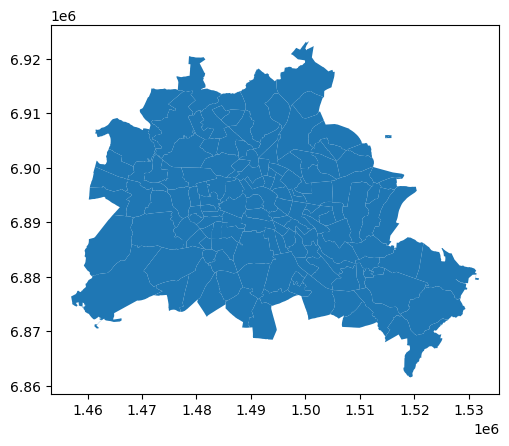

In [25]:
geo_neighbourhoods.plot()

In [26]:
geo_neighbourhoods['neighbourhood'].nunique()

138

In [27]:
geo_neighbourhoods['neighbourhood_group'].nunique()

12

In [28]:
# Number of places per neighbourhood
gdf.sjoin_nearest(geo_neighbourhoods, how="left").groupby("neighbourhood").count()

ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

In [ ]:
# Number of places per neighbourhood
gdf.sjoin_nearest(geo_neighbourhoods, how="left").groupby("neighbourhood_group").count()

In [ ]:
geojason_shops = gdf.sjoin_nearest(geo_neighbourhoods, how="left")
geojason_shops['title'].value_counts()

In [ ]:
geojason_shops[geojason_shops['title']== 'Tchibo im Supermarkt']

In [ ]:
geojason_shops['neighbourhood'].unique()

## Unify the shops & print the amount per neighbourhood


In [29]:
geojason_shops.to_file('shops.geojson', driver = 'GeoJSON')

NameError: name 'geojason_shops' is not defined

In [30]:
# use a link or file
# use geojson.io to create custom geojson files
# can also use folium Draw control to create geojson files (example below)


# add geojson file to map
folium.GeoJson('shops.geojson', name='geojson shops').add_to(berlin_map)

# add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(berlin_map)

# display map
berlin_map


In [31]:
""""
# all subgroups
whole_berlin = folium.FeatureGroup(name='Ganz Berlin hasst die Polizei')
berlin_map_auto.add_child(whole_berlin)

# subgroup 1
neighbourhood = plugins.FeatureGroupSubGroup(whole_berlin, 'Neighbourhoods')
berlin_map_auto.add_child(neighbourhood)

# subgroup 2
bezirke = plugins.FeatureGroupSubGroup(whole_berlin, 'Bezirke')
berlin_map_auto.add_child(bezirke)

# subgroup 3
#sales_region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 3')
#map_with_subgroups.add_child(sales_region3)

# pull in geojson layers and add to map
folium.GeoJson('neighbourhoods.geojson').add_to(neighbourhood)
folium.GeoJson('https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson').add_to(bezirke)
#folium.GeoJson('sales_region3.geojson').add_to(sales_region3)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(berlin_map_auto)

# display map
berlin_map_auto
``` 

SyntaxError: incomplete input (1841142268.py, line 1)

In [32]:
# Function that shows shops per neighbourhood
def display_district(data, neighbourhood_var, shop_category):
    district_shop_df = data[(data.neighbourhood_group == neighbourhood_var) & (data.final_categories == shop_category)].reset_index()
    sentence = f"There are {len(shop_category)} {shop_category} stores in {neighbourhood_var}"
    #print(sentence)   
    return sentence

In [33]:
display_district(data, 'Neukölln', "children's clothing")

"There are 19 children's clothing stores in Neukölln"